In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Main_Berkeley_Data-Copy1.csv")


C:\Users\Administrador2\AppData\Local\Temp\ipykernel_15160\2985772144.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Main_Berkeley_Data-Copy1.csv")


In [8]:
df.describe()

,YEAR,INDCAT,INCOME,WAGEINC,DEBT2INC,DEBT,NETWORTH,EDCL
count,238880.000000,238880.000000,2.388800e+05,2.388800e+05,238880.000000,2.388800e+05,2.388800e+05,238880.000000
mean,2004.196542,2.350540,7.596447e+05,1.613354e+05,2.580740,2.612375e+05,9.378397e+06,2.916427
std,8.523608,1.057611,5.337825e+06,1.209580e+06,293.009388,2.554587e+06,5.050908e+07,1.060736
min,1989.000000,1.000000,0.000000e+00,-9.614621e+04,0.000000,0.000000e+00,-2.340803e+08,1.000000
25%,1998.000000,2.000000,3.240437e+04,0.000000e+00,0.000000,0.000000e+00,2.322932e+04,2.000000
50%,2004.000000,2.000000,7.010760e+04,4.089610e+04,0.345843,2.561099e+04,2.080907e+05,3.000000
75%,2013.000000,4.000000,1.733216e+05,1.010351e+05,1.372051,1.579799e+05,1.351380e+06,4.000000
max,2016.000000,4.000000,3.993023e+08,1.115575e+08,64008.372978,2.934870e+08,2.928346e+09,4.000000


In [9]:
import numpy as np
import statsmodels.api as sm

In [11]:
x_ary = df["INCOME"]
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(df["NETWORTH"], x_with_cnst)
results = model.fit()
b, m = results.params
print(m)
print(b)

5.270583653197695
5374625.978696722


In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               NETWORTH   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:56:41   Log-Likelihood:            -4.5318e+06
No. Observations:              238880   AIC:                         9.064e+06
Df Residuals:                  238878   BIC:                         9.064e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.375e+06   8.67e+04     61.996      0.0

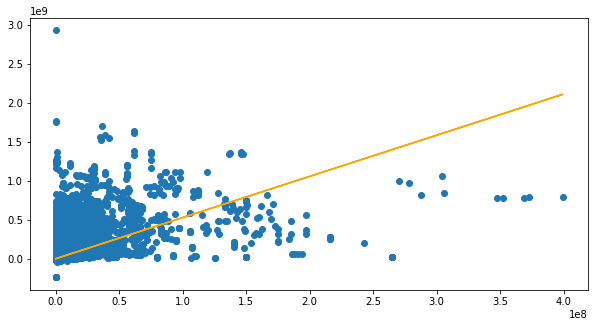

In [14]:
plt.figure(figsize = (10,5))
plt.scatter(df["INCOME"], df["NETWORTH"])
plt.plot(x_ary, m*x_ary+b, color = "orange")